# INFO 2950 PHASE 4

## Part 1: Introduction

#### Background Information
Drugs heavily impact the personality traits and characteristics of an individual, especially based on the frequency of their useage and of what drug. In this project, we aim to explore whether we can predict a person's drug use based on their personality traits. To do so, we would explore potentional correlations between specific personality traits and drug use,looking at: neuroticism, extraversion, openness to experience, agreeableness, conscientiousness, impulsivity, and sensation seeking. We will train a multivariable regression to see if we can reliably predict a person's drug use based on a person's personality traits. It is important to recognize hightened or unusual personality traits, especially in individuals who could be exposed to life-threatening drugs or unsafe situations of usage. We hope this evaluation will be a resource for readers to better understand effects of drug usage and what traits are heightened after using a certain drug. 

#### Research Questions
- Can we reliably predict a person's drug use based off a person's personality traits? 
- What types of drugs are more likely to be used by certain personalities?

## Part 2: Data Description

- #### What are the observations (rows) and the attributes (columns)?
This dataset contains records for 1885 respondents with the following 12 columns: personality measurements(neuroticism, extraversion, openness to experience, agreeableness, conscientiousness, impulsivity, sensation seeking), level of education, age, gender, country of residence, and ethnicity. It also contains responses for the responders use of 18 legal and illegal drugs(18 more columns): alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and Semerone (fictitious drug to identify overresponders). Each row represents the response of one person - the responders have selected whether they never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

- #### Why was this dataset created?
This dataset was accessed from UC Irvine Machine Learning Repository, where it was created by Elaine Fehrman, Vincent Egan, and Evgeny Mirkes. This data set was created to evaluate an individual's risk of drug consumption and misuse based on categorical data. 

- #### Who funded the creation of the dataset?
This data collection was independantly funded and created by the authors of the dataset listed above.

- #### What processes might have influenced what data was observed and recorded and what was not?
An anonymous online survey methodology from Survey Gizmo was used to collect this data, which could have influenced people's responses because they can choose which questions to answer honestly or not. The people had to take a personality test to get the personality data. The data was analyzed and organized by the three authors listed at the beginning of this paragraph, and the uci machine learning repositiory obtained it for us to get the current form of the data. 

- #### What preprocessing was done, and how did the data come to be in the form that you are using?
There was preprocessing done, specifically the answers for how often the respondants use drugs was turned into classes representing the category of their response. The data was collected and formatted by the authors listed above who turned it into the UC Irvine Machine Learning Repository.

- #### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
Yes, the people responding were aware of the data collection, as they filled out the form voluntarily, and they knew the data was going to be analyzed and collected for this dataset.

- #### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box)
This is a link to the dataset: https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified and here is the github link to the raw data: https://github.com/uci-ml-repo/ucimlrepo?tab=readme-ov-file

## Part 3: Preregistration Statement

#### Hypothesis 1: 
Users who have higher sensation-seeking scores are most likely to be high users of stimulants.

Analysis: Run a logistic regression where our output variable is the binary variable representing the odds of being a heavy user of drugs classified as stimulants, and the input is a user’s sensation-seeking score. We aim to test whether there is a significant positive relationship between sensation-seeking and stimulant drug use, such that higher scores on sensation-seeking are associated with higher odds of being a heavy user of stimulant drugs. Specifically, we will test whether the coefficient 𝛽 sensation-seeking>0.


#### Hypothesis 2: 
Users who have higher neuroticism and lower conscientiousness scores are most likely to be high users of extreme drugs.

Analysis: We will run a multinvariate logistic regression model with the following predictor variables: neuroticism score and conscientiousness score. The outcome variable will be the binary indicator of heavy drug use of extreme drugs (coke, crack, heroin, ecstasy, ketamine). We will evaluate each predictor’s contribution to the odds of being a heavy user. We will test if βneuroticism > 0 (higher neuroticism is positively associated with higher odds of heavy drug use) and if βconscientiousness < 0 (lower conscientiousness is positively associated with higher odds of heavy drug use).


## Part 4: Data Analysis

In [1]:
# imports and settings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Read in cleaned csv file for data features:

In [2]:
features= pd.read_csv("cleaned_features.csv")
features.head()

,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsive,sensation-seeking
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


Read in cleaned csv file for data targets:

In [3]:
targets= pd.read_csv("cleaned_targets.csv")
targets.head()

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,...,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa,stimulant,extreme
0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0,1,...,0,0,0,1,0,1,0,0,1,1
2,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Question 1: Are users who have higher sensation-seeking scores more likely to be users of stimulants?

Hypothesis: We hypothesize that there is a positive relationship between sensation-seeking score and odds of being a stimulant user.

Null Hypothesis: There is no significant relationship between sensation-seeking score and odds of being a stimulant user

Alternative Hypothesis: There is a significant positive relationship between sensation-seeking score and odds of being a stimulant user

First, we decided to visualize the relationship between these two variables with a graph

The correlation between sensation-seeking score and odds of being a stimulant user is 0.231.


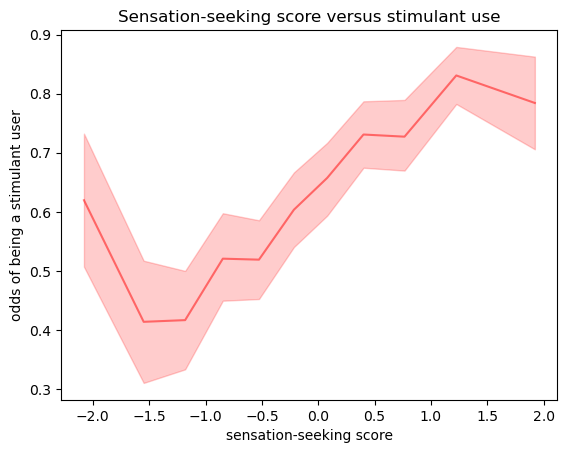

In [4]:
sns.lineplot(x= features['sensation-seeking'], y=targets['stimulant'], color = 'red', alpha=0.5);
plt.title('Sensation-seeking score versus stimulant use')
plt.xlabel('sensation-seeking score')
plt.ylabel('odds of being a stimulant user')
correlation = features['sensation-seeking'].corr(targets['stimulant'])
print(f'The correlation between sensation-seeking score and odds of being a stimulant user is {correlation:.3f}.')

In [5]:
data = pd.concat([features['sensation-seeking'], targets['stimulant']], axis=1).dropna()
X = data[['sensation-seeking']]
y = data['stimulant']
X = sm.add_constant(X)  

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

beta = result.params['sensation-seeking']
p_value = result.pvalues['sensation-seeking']

Optimization terminated successfully.
         Current function value: 0.627807
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              stimulant   No. Observations:                 1877
Model:                          Logit   Df Residuals:                     1875
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                 0.04154
Time:                        17:04:28   Log-Likelihood:                -1178.4
converged:                       True   LL-Null:                       -1229.5
Covariance Type:            nonrobust   LLR p-value:                 5.130e-24
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5997      0.050     12.037      0.000       0.502       0.697
sensatio

The results of the t-test shows that the p-value for sensation-seeking is about 0.000, which is smaller than the 0.05 threshold. The coefficient for sensation-seeking is 0.5219. This means that we can reject the null hypothesis. There is evidence to support that there is a signficiant positive relationship between sensation-seeking score and odds of being a stimulant user.

##### Question 2: What is the relationship between neuroticism and conscientiousness score and use of extreme drugs?

Hypothesis: We predict that users who have higher neuroticism and lower conscientiousness scores are most likely to be high users of extreme drugs.

Null Hypothesis: There is no significant relationship between neuroticism and conscientiousness score and odds of being a user of extreme drugs

Alternative Hypothesis: There is a significant positive relationship between high neuroticism score and low conscientiousness score and odds of being a user of extreme drugs

In [22]:
data = pd.concat([
    features[['neuroticism', 'conscientiousness']], 
    targets['extreme']
], axis=1).dropna()

# Prepare input (X) and output (y)
X = data[['neuroticism', 'conscientiousness']] 
X = sm.add_constant(X)  
y = data['extreme'] 

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.639310
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                extreme   No. Observations:                 1877
Model:                          Logit   Df Residuals:                     1874
Method:                           MLE   Df Model:                            2
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                 0.01846
Time:                        17:09:19   Log-Likelihood:                -1200.0
converged:                       True   LL-Null:                       -1222.5
Covariance Type:            nonrobust   LLR p-value:                 1.590e-10
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6054      0.049    -12.363      0.000      -0.701      -0.509
neurotic

The results of the t-test shows that the p-value for conscientiousness is about 0.000, which is smaller than the 0.05 threshold. The coefficient for conscientiousness is -0.2883. This means that we can reject the part of the null hypothesis regarding conscientiousness score. There is evidence to support that there is a signficiant negative relationship between conscientiousness score and odds of being a extreme drug user. The results of the t-test shows that the p-value for neuroticism is about 0.115, which is not smaller than the 0.05 threshold. The coefficient for conscientiousness is very close to 0 at 0.0839. This means that we cannot reject the part of the null hypothesis that there is no significant relationship between conscientiousness score and the odds of being a user of extreme drugs.

## Part 5: Evaluation of Significance

## Part 6: Conclusions

## Part 7: Limitations

There were a few limitations we discovered in the data. First, there was bias in the data. In this article about the data: https://arxiv.org/abs/1506.06297, the biases described were as follows: the sample was highly educated and all native english speaking. The largest bias of the data was that its respondants were 91.2% white. This could affect how representative the data is of the general population, especially any racial category besides white, as well as less educated and non-native speakers. Also, the data for the targets about the drug use was seperated into classes that described the last time the respondants had used the drug. This was difficult to quanitify and represent as numbers, and we may have not chosen the most accurate way to represent the drug use of the responders. 

## Part 8: Acknowledgements and Bibliography
#### Sources:
- https://www.cpp.edu/health/health-topics/stimulants.shtml
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html